In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock=pd.read_csv('apple1990~2022.csv',header=0)
stock

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,02-01-1990,0.312500,0.314732,183198400,0.334821,0.332589,0.264886
1,03-01-1990,0.334821,0.339286,207995200,0.339286,0.334821,0.266663
2,04-01-1990,0.332589,0.341518,221513600,0.345982,0.335938,0.267553
3,05-01-1990,0.330357,0.337054,123312000,0.341518,0.337054,0.268442
4,08-01-1990,0.330357,0.334821,101572800,0.339286,0.339286,0.270220
...,...,...,...,...,...,...,...
8290,25-11-2022,147.119995,148.309998,35195900,148.880005,148.110001,148.110001
8291,28-11-2022,143.380005,145.139999,69246000,146.639999,144.220001,144.220001
8292,29-11-2022,140.350006,144.289993,83763800,144.809998,141.169998,141.169998
8293,30-11-2022,140.550003,141.399994,111224400,148.720001,148.029999,148.029999


In [4]:
stock['Date']=pd.to_datetime(stock['Date'])
df=stock.loc[stock['Date']>="2000"]

,Date,Low,Open,Volume,High,Close,Adjusted Close
2528,2000-03-01,0.907924,0.936384,535796800,1.004464,0.999442,0.851942
2529,2000-04-01,0.903460,0.966518,512377600,0.987723,0.915179,0.780115
2530,2000-05-01,0.919643,0.926339,778321600,0.987165,0.928571,0.791531
2531,2000-06-01,0.848214,0.947545,767972800,0.955357,0.848214,0.723033
2532,2000-07-01,0.852679,0.861607,460734400,0.901786,0.888393,0.757282
...,...,...,...,...,...,...,...
8290,2022-11-25,147.119995,148.309998,35195900,148.880005,148.110001,148.110001
8291,2022-11-28,143.380005,145.139999,69246000,146.639999,144.220001,144.220001
8292,2022-11-29,140.350006,144.289993,83763800,144.809998,141.169998,141.169998
8293,2022-11-30,140.550003,141.399994,111224400,148.720001,148.029999,148.029999


Text(0, 0.5, 'price')

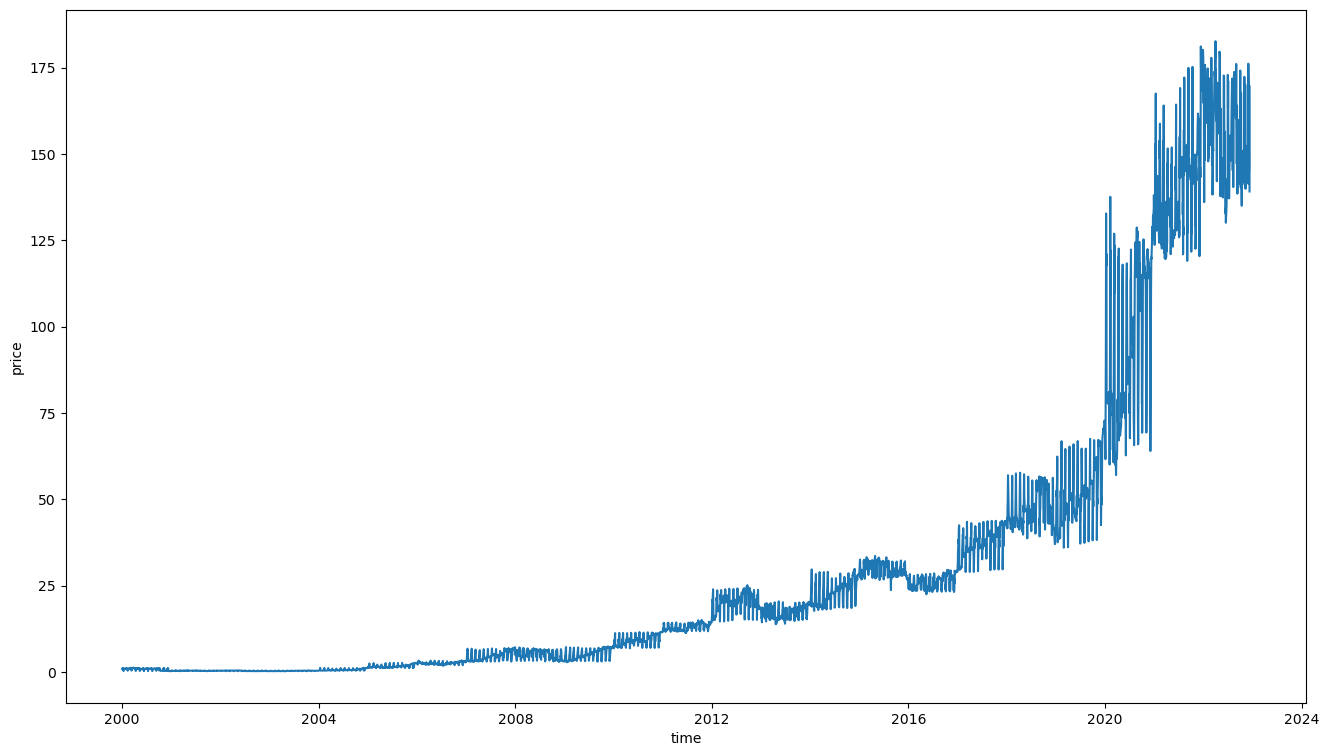

In [5]:
plt.figure(figsize=(16,9))
sns.lineplot(y=df['Open'],x=df['Date'])
plt.xlabel('time'); plt.ylabel('price')

In [8]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler=MinMaxScaler()
scale_cols=['Open','High','Low','Close','Volume']
df_scaled=scaler.fit_transform(df[scale_cols])
df_scaled=pd.DataFrame(df_scaled)
df_scaled.column=scale_cols
df_scaled

C:\Users\LOAR\AppData\Local\Temp\ipykernel_6540\3299455046.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_scaled.column=scale_cols


,0,1,2,3,4
0,0.003862,0.004209,0.003806,0.004209,0.067773
1,0.004027,0.004117,0.003781,0.003746,0.064602
2,0.003807,0.004114,0.003871,0.003819,0.100607
3,0.003923,0.003940,0.003472,0.003377,0.099206
4,0.003452,0.003647,0.003497,0.003598,0.057611
...,...,...,...,...,...
5762,0.811840,0.813579,0.821122,0.813506,0.000000
5763,0.794460,0.801318,0.800216,0.792106,0.004610
5764,0.789800,0.791302,0.783278,0.775328,0.006575
5765,0.773956,0.812703,0.784396,0.813066,0.010293


In [9]:
TEST_SIZE=200
WINDOW_SIZE=20
train=df_scaled[:-TEST_SIZE]
test=df_scaled[:-TEST_SIZE:]

In [10]:
def make_dataset(data,label,window_size=20):
    feature_list=[]
    label_list=[]
    for i in range(len(data)-window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
        return np.array(feature_list),np.array(label_list)

In [12]:
from sklearn.model_selection import train_test_split

feature_cols=['Open','High','Low','Volume']
label_cols=['Close']

train_feature=train[feature_cols]
train_label=train[label_cols]

train_feature,train_label=make_dataset(train_feature,train_label,20)

x_train,x_valid,y_train,y_valid=train_test_split(train_feature,train_label,test_size=0.2)
x_train.shape, x_valid.shape

KeyError: "None of [Index(['Open', 'High', 'Low', 'Volume'], dtype='object')] are in the [columns]"